In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys


import legendre

In [8]:
N = 100
tmax=10
dt = tmax/N

lam = np.logspace(start=-8, stop=2, base=10, num=20)

S_norm_OM  = []
S_norm_MSR = []

for l in lam:
    t = legendre.transform_nomemory(lambda_=l, a=10, D=1, N=N, noise="d", pot="m", tmax=tmax)
    S_G = 2 * (t.Pot_mexico(0) - t.Pot_mexico(-1)) / (1 + l * 10 ** 2)

    #op = t.minimize_full()
    res = t.minimize()
    #S_norm_OM.append(op.fun/S_G)
    S_norm_MSR.append(res.fun/S_G)

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


KeyboardInterrupt: 

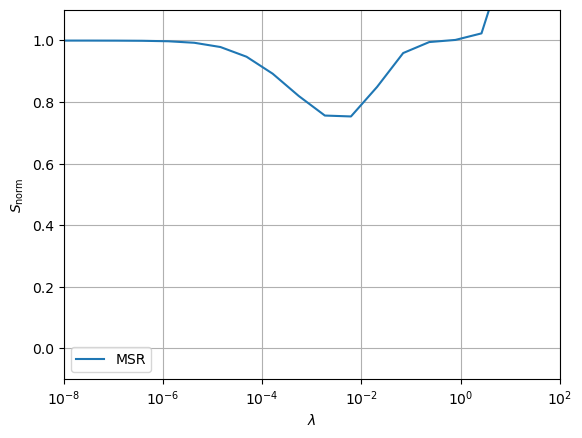

In [ ]:
fig3 = plt.figure()
#plt.plot(lam, S_norm_OM, label="OM")
plt.plot(lam, S_norm_MSR, label="MSR")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$S_\mathrm{norm}$")
plt.xscale("log")
plt.grid()
plt.legend()
plt.axis([min(lam), max(lam), -0.1, 1.1])
plt.savefig("S_norm_test.pdf", dpi=500, bbox_inches="tight")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre


tau = [1.0, 0.2, 0.05]
tmax = 4
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

test1 =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[0], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res1 = test1.minimize(in_cond=np.ones(2*N) * (-1e-1))
test2 =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res2 = test2.minimize(in_cond=np.ones(2*N) * (-1e-1))
test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[2], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res = test.minimize(in_cond=np.ones(2*N) * (-1e-1))



Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2519738951362305
            Iterations: 155
            Function evaluations: 47333
            Gradient evaluations: 155
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.320804165865805
            Iterations: 160
            Function evaluations: 48672
            Gradient evaluations: 160
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1516822194867635
            Iterations: 156
            Function evaluations: 47218
            Gradient evaluations: 156


Text(0, 0.5, '$q$')

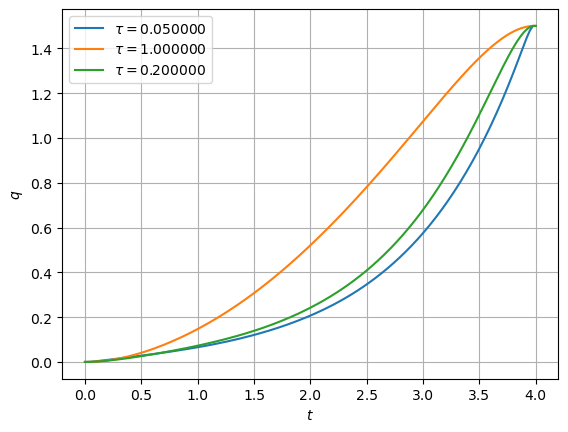

In [ ]:
plt.plot(time, res.x[:N], label=r"$\tau=%f$" % tau[2])
plt.plot(time, res1.x[:N], label=r"$\tau=%f$" % tau[0])
plt.plot(time, res2.x[:N], label=r"$\tau=%f$" % tau[1])
plt.legend()
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$q$")

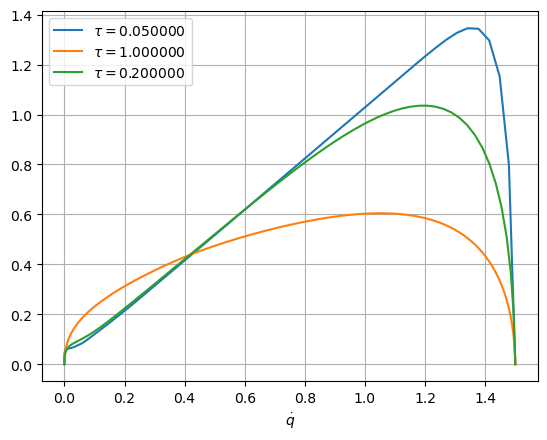

In [ ]:
plt.plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\tau=%f$" % tau[2])
plt.plot(res1.x[:N-1], (res1.x[1:N] - res1.x[:N-1])/dt, label=r"$\tau=%f$" % tau[0])
plt.plot(res2.x[:N-1], (res2.x[1:N] - res2.x[:N-1])/dt, label=r"$\tau=%f$" % tau[1])
plt.xlabel(r"$q$")
plt.xlabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

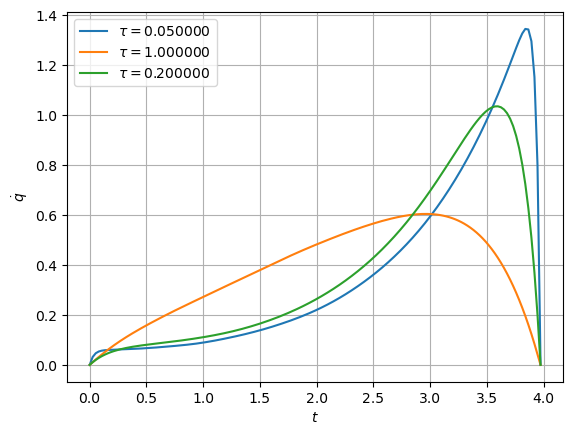

In [ ]:
plt.plot(time[:-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\tau=%f$" % tau[2])
plt.plot(time[:-1], (res1.x[1:N] - res1.x[:N-1])/dt, label=r"$\tau=%f$" % tau[0])
plt.plot(time[:-1], (res2.x[1:N] - res2.x[:N-1])/dt, label=r"$\tau=%f$" % tau[1])
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre


tau = [1.0, 0.2, 0.05]
tmax = 4
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

test_2 =  legendre.transform(lambda_=0.01, a=10.0, tau=tau[-1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res_2 = test_2.minimize(in_cond=np.ones(2*N) * (-1e-1))
test_3 =  legendre.transform(lambda_=0.1, a=10.0, tau=tau[-1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res_3 = test_3.minimize(in_cond=np.ones(2*N) * (-1e-1))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4719352904551208
            Iterations: 162
            Function evaluations: 49017
            Gradient evaluations: 162
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16662742830688684
            Iterations: 175
            Function evaluations: 52893
            Gradient evaluations: 175


Text(0, 0.5, '$q$')

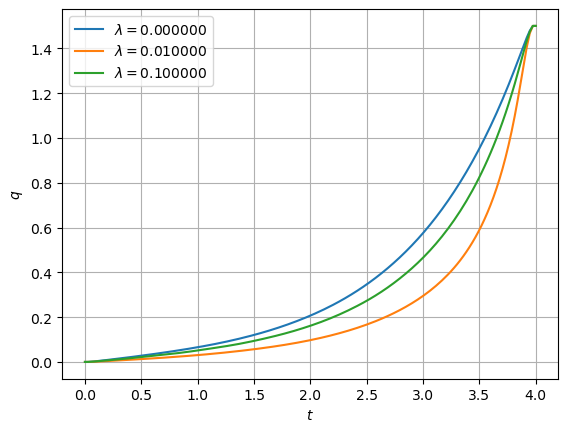

In [ ]:
plt.plot(time, res.x[:N], label=r"$\lambda=%f$" % 0)
plt.plot(time, res_2.x[:N], label=r"$\lambda=%f$" % 0.01)
plt.plot(time, res_3.x[:N], label=r"$\lambda=%f$" % 0.10)
plt.legend()
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$q$")

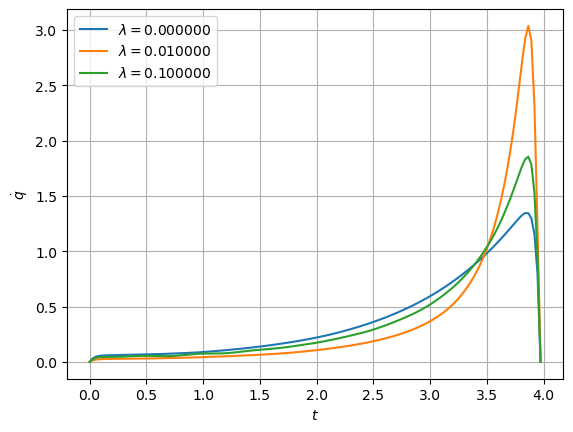

In [ ]:
plt.plot(time[:-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=%f$" % 0)
plt.plot(time[:-1], (res_2.x[1:N] - res_2.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.01)
plt.plot(time[:-1], (res_3.x[1:N] - res_3.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.1)
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

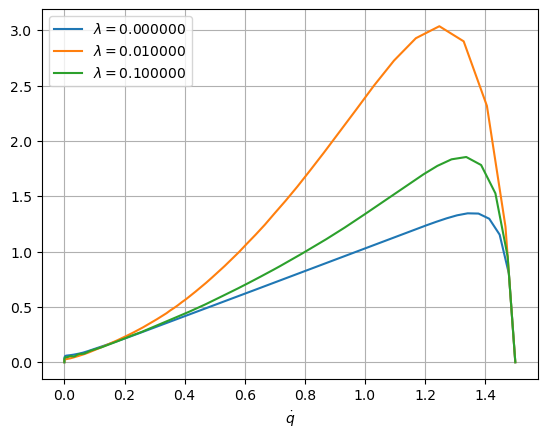

In [ ]:
plt.plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=%f$" % 0)
plt.plot(res_2.x[:N-1], (res_2.x[1:N] - res_2.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.01)
plt.plot(res_3.x[:N-1], (res_3.x[1:N] - res_3.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.1)
plt.xlabel(r"$q$")
plt.xlabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

# $\tau$ dependence of action

Can show that for a harmonic potential $V(q)=q^2/2$ the action becomes $S(\tau) = x_f^2(1+\tau)/D$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 10
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

tau = np.linspace(0, 0.99, 10)
xf = 1.5

# for V(q) = q^4 / 4 - q^2 / 2 from -1 to 0

def AP_pred(tau):
    x0 = -1
    xf = 0

    return 1/4  - tau ** 2 / 2 * (-0.25) #- tau**4 * 0.3

def MY_pred(tau):
    x0 = 0
    xf = 1.5
    return (xf**4 / 4 - 3*xf**3 / 2 + 9*xf**2 / 4) - (x0**4 / 4 - 3*x0**3 / 2 + 9*x0**2 / 4)  - tau ** 2 / 2 * (-6.40723) + tau / 2 * (xf**3 - 9*xf**2 / 2 + 9 * xf / 2)


def S_expected(tau):
    return xf**2 * (1 + tau) / 2





In [ ]:
def action(tau, pot, ini, fin):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-1))
    return res.fun

def action1(tau, pot, ini, fin):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    return res.fun

def action2(tau, pot, ini, fin, N=150):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    return res.fun

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 10
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)


tau = np.logspace(start=0, stop=2, num=10, base=10, endpoint=True)

def action2(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6), maxiter=maxiter)
    return res.fun

[0.24995488 0.24994876 0.24996693 0.25007372 0.25040768 0.25150036
 0.25454393 0.26215753 0.27897037 0.31244737]
[0.06091299 0.04146483 0.01604221 0.02144097 0.07108267 0.15682615
 0.284729   0.45669235 0.65239415 0.84303952]
0.07407407407407407


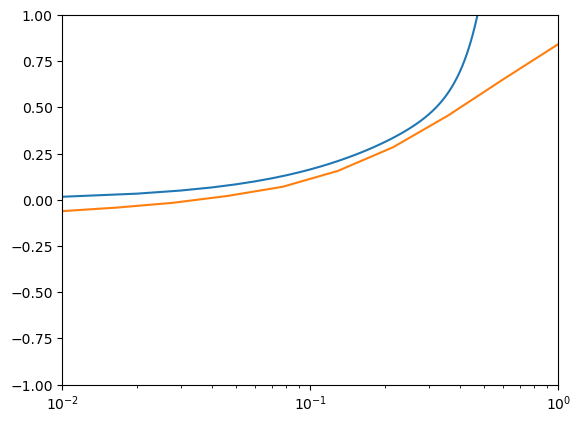

In [ ]:
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

t = np.linspace(1e-2, 1, 100)
#plt.plot(tau, S3)
#plt.plot(tau, S4)
S5 = np.array(S5)
plt.plot(t, (g(t)- AP_pred(0))/(8/27 * t * AP_pred(0)))
plt.plot(tau, (S5 - AP_pred(0))/(8/27 * tau * AP_pred(0)))
plt.xscale("log")
#plt.yscale("log")

print(S5)
plt.axis([1e-2, 1e0, -1, 1])
print(np.abs(S5-AP_pred(0))/(8/27 * tau*AP_pred(0)))
print(8/27 * AP_pred(0))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 1000
N = 500
dt = tmax/N
time = np.linspace(0, tmax, N)

def actionTest(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.TransformLargeTau(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(N) * (-1), guess=np.ones(N) * (-1e-6), maxiter=maxiter)
    return res.fun, res.x

def action2(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(N) * (-1e-6), maxiter=maxiter)
    return res.fun, res.x[:N]

def action_adj(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


#R = actionTest(100, "m", -1, 0, N=N)[-1]

#R1 = action2(100, "m", -1, 0, N=N)[-1]







In [ ]:
R2 = action_adj(100, "m", -1, 0, N=N)[-1]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.989098649340517
            Iterations: 501
            Function evaluations: 252914
            Gradient evaluations: 501


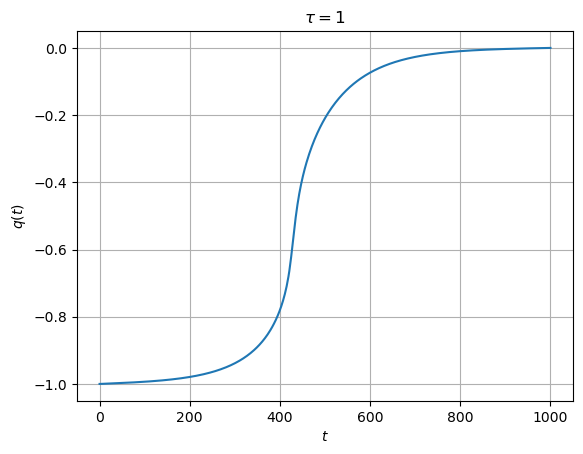

In [ ]:
#plt.plot(np.linspace(0, tmax, N), R)
#plt.plot(np.linspace(0, tmax, N), R1)
plt.plot(np.linspace(0, tmax, N), R2)
plt.xlabel(r"$t$")
plt.ylabel(r"$q(t)$")
plt.grid()
plt.title(r"$\tau=100$")
plt.show()

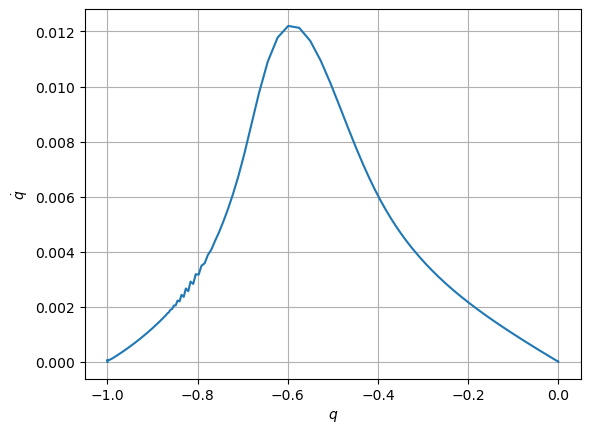

In [ ]:
plt.plot(R2[:-1], (R2[1:] - R2[:-1]) / dt)
#plt.plot(R1[:-1], (R1[1:] - R1[:-1]) / dt)
plt.xlabel(r"$q$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.show()

# Fix large tau limit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tau = np.logspace(0, 2, base=10, endpoint=True, num=10)
N = 200
tmax = 1000
time = np.linspace(0, tmax, N)

def action_adj(tau, pot, ini, fin, N=250, maxiter=1500, tmax=tmax):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


instanton = np.linspace(-1, 0, N)

S = []
n = [300, 300, 300, 300, 300, 300, 500, 500, 550, 550]
tmax=[100,200, 300, 300, 300, 300, 1000, 1000, 1000, 1000]


i = 0
for t in tau:
    tm = tmax[i]
    N = n[i] #* (1+int(np.log(t)))
    s, instanton = action_adj(t, "m", -1, 0, N=N, tmax=tm)
    print(tm, N, t)
    if t == tau[0]:
        inst = instanton
    S.append(s)
    i += 1







Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2971724955319758
            Iterations: 119
            Function evaluations: 36056
            Gradient evaluations: 119
100 300 1.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3362294529444075
            Iterations: 67
            Function evaluations: 20296
            Gradient evaluations: 67
200 300 1.6681005372000588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.417001148059744
            Iterations: 61
            Function evaluations: 18479
            Gradient evaluations: 61
300 300 2.7825594022071245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.584301625509048
            Iterations: 98
            Function evaluations: 29692
            Gradient evaluations: 98
300 300 4.641588833612778
Optimization terminated successfully    (Exit mode 0)
  

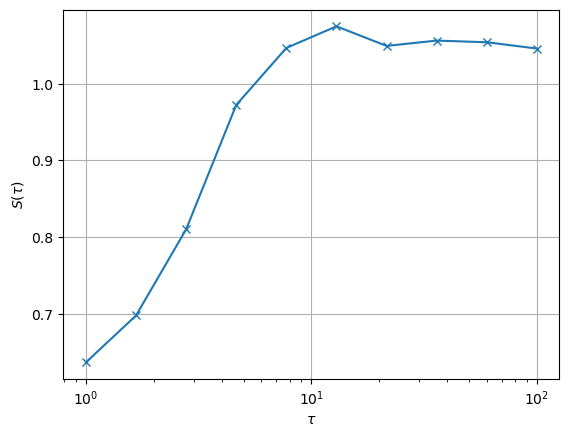

[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In [ ]:
plt.plot(tau, (np.array(S)-0.25) /(2/27* tau), "x-")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S(\tau)$")
plt.grid()
plt.xscale("log")
plt.show()


[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


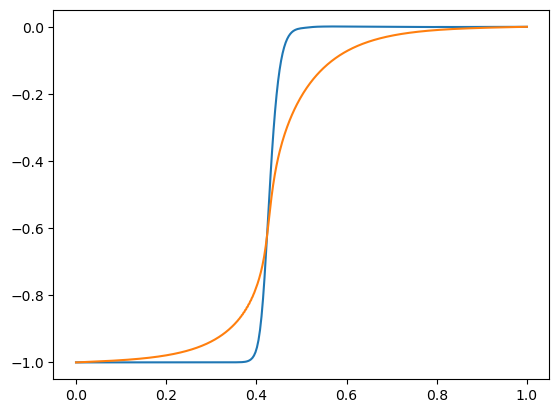

[-1.00000000e+00 -1.00000000e+00 -1.00000030e+00 -1.00003478e+00
 -1.00004738e+00 -1.00004815e+00 -1.00003171e+00 -1.00000906e+00
 -1.00000847e+00 -1.00002633e+00 -1.00004927e+00 -1.00005993e+00
 -1.00006372e+00 -1.00006427e+00 -1.00006846e+00 -1.00006760e+00
 -1.00006470e+00 -1.00005731e+00 -1.00004889e+00 -1.00003809e+00
 -1.00002648e+00 -1.00002052e+00 -1.00001902e+00 -1.00003035e+00
 -1.00004081e+00 -1.00005587e+00 -1.00005678e+00 -1.00005160e+00
 -1.00003221e+00 -1.00000799e+00 -9.99985047e-01 -9.99965736e-01
 -9.99963847e-01 -9.99970919e-01 -9.99992514e-01 -1.00001335e+00
 -1.00002397e+00 -1.00001932e+00 -9.99990846e-01 -9.99955045e-01
 -9.99919224e-01 -9.99900417e-01 -9.99910690e-01 -9.99933674e-01
 -9.99965987e-01 -9.99978050e-01 -9.99961092e-01 -9.99931436e-01
 -9.99895720e-01 -9.99889050e-01 -9.99912101e-01 -9.99938879e-01
 -9.99958824e-01 -9.99945137e-01 -9.99913201e-01 -9.99907778e-01
 -9.99923856e-01 -9.99953195e-01 -9.99975897e-01 -9.99955392e-01
 -9.99934541e-01 -9.99966

In [ ]:
t1 = np.linspace(0, tmax[0], n[0])/tmax[0]
t2 = np.linspace(0, tmax[-1], n[-1])/tmax[-1]
plt.plot(t1, inst)
plt.plot(t2, instanton)
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995664719510244
            Iterations: 69
            Function evaluations: 13938
            Gradient evaluations: 69


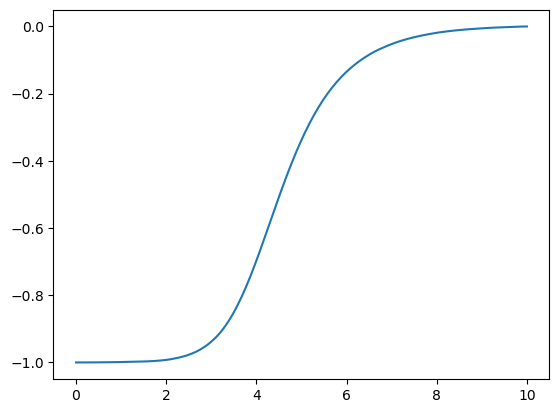

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed


def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


tm = 10
N = 200

Act, Inst = action_adj(tau=0, pot="m", ini=-1, fin=0, N=200, tm=tm, maxiter=1500)
t = np.linspace(0, tm, N)

plt.plot(t, Inst)

In [ ]:
tau = np.zeros(11)
tau[1:] = np.logspace(-2, -1, base=10, endpoint=True, num=10)
n = []
tm = []
for i in range(len(tau[tau<=1])):
    n.append(300)
    tm.append(10)



# k = [300, 300, 300, 300, 300, 300, 500, 500, 550, 550]
# tx=[100,200, 300, 300, 300, 300, 1000, 1000, 1000, 1000]



# for i in range(10):
#     n.append(k[i])
#     tm.append(tx[i])

# k = np.ones(len(tau)-len(n), dtype=int) * 1000
# tx= np.ones(len(tau)-len(n)) * 10000

# for i in range(len(tau)-len(n)):
#     n.append(k[i])
#     tm.append(tx[i])

# print(tau)
# print(len(tau)-len(n))
# print(n)

In [ ]:
def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0):
    test =  legendre.transform_adjust(lambda_=lambd, a=a, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun


S = Parallel(n_jobs=5)(delayed(action_adj)(tau=tau[i], pot="m", ini=-1, fin=0, tm=tm[i], N=n[i]) for i in range(len(tau)))
#S2 = Parallel(n_jobs=5)(delayed(action_adj)(tau=tau[i], pot="m", ini=-1, fin=0, tm=tm[i], N=n[i], lambd=0.01, a=1) for i in range(len(tau)))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24994876482558753
            Iterations: 56
            Function evaluations: 16912
            Gradient evaluations: 56
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995487926106197
            Iterations: 60
            Function evaluations: 18120
            Gradient evaluations: 60
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995052179828245
            Iterations: 57
            Function evaluations: 17214
            Gradient evaluations: 57
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995183189714898
            Iterations: 58
            Function evaluations: 17516
            Gradient evaluations: 58
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24999238095421794
            Iterations: 116
      

0.24999238095421794 0.24995664719510244
[0.         0.01       0.0129155  0.01668101 0.02154435 0.02782559
 0.03593814 0.04641589 0.05994843 0.07742637 0.1       ]


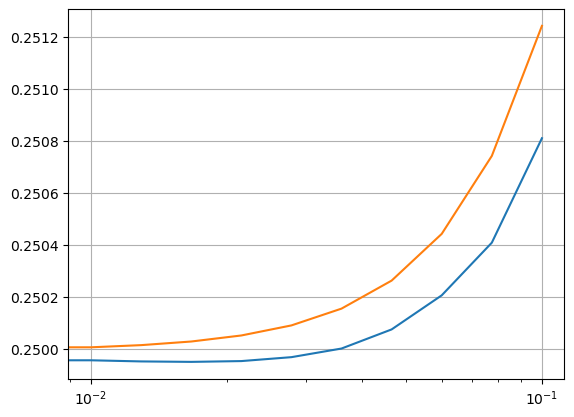

In [ ]:
def g(t):
    dV = S[0]
    return dV* ( 1  + 0.5 * t**2 )#- 6/5 * t**4 + 279/35 * t**6)

print(S[0], Act)
tau = np.array(tau)
print(tau)
plt.plot(tau[:], S[:])
#plt.plot(tau[1:], S2[1:])
plt.plot(tau[:], g(tau[:]))
plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0, init_cond=np.zeros(400), noise="d", b=1/2):
    test =  legendre.transform_adjust_2(lambda_=lambd, a=a, tau=tau, D1=0, D2=1, N=N, noise=noise, pot=pot, tmax=tm, const_i=ini, const_f=fin, b=b)
    res = test.minimize( maxiter=maxiter, in_cond=init_cond)
    return res.fun

N = 300
tau = 1e-3
tau2 = 1e-2
tau3 = 1e-1
tau4 = 1e0
tau5 = 1e1
tm = 100

l = np.logspace(-8, 2, base=10, num=20, endpoint=True)
alp = np.logspace(-2, 2, base=10, num=20,endpoint=True)


In [3]:

S_l = []
S_lt = []
S_lt0 = []
S_l0 = []

for L in l:
    print(" ############################################################################################################# ")
    S_l.append(action_adj(tau=tau, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lt.append(action_adj(tau=tau, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_l0.append(action_adj(tau=0, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lt0.append(action_adj(tau=0, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))

 ############################################################################################################# 
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499920
         Iterations: 336
         Function evaluations: 140878
         Gradient evaluations: 468
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499908
         Iterations: 210
         Function evaluations: 77669
         Gradient evaluations: 258
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499928
     

In [6]:

S_le = []
S_lg = []
S_le0 = []
S_lg0 = []

for L in l:
    print(" ############################################################################################################# ")
    S_le.append(action_adj(tau=tau, pot="m", noise="e", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lg.append(action_adj(tau=tau, pot="m", noise="g", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L, b=0.8))
    S_le0.append(action_adj(tau=0, pot="m", noise="e",ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lg0.append(action_adj(tau=0, pot="m", noise="g", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L, b=0.8))

 ############################################################################################################# 
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetric exponential with characteristic scale 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.091418
         Iterations: 62
         Function evaluations: 25585
         Gradient evaluations: 85
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: gamma distributed with scale 0.800000
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.091427
         Iterations: 62
         Function evaluations: 25284
         Gradient evaluations: 84
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetri

In [2]:

S_le2 = []
S_lg2 = []
S_le3 = []
S_lg3 = []

for L in l:
    print(" ############################################################################################################# ")
    S_le2.append(action_adj(tau=tau2, pot="m", noise="e", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lg2.append(action_adj(tau=tau2, pot="m", noise="g", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L, b=0.8))
    S_le3.append(action_adj(tau=tau3, pot="m", noise="e",ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lg3.append(action_adj(tau=tau3, pot="m", noise="g", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L, b=0.8))

 ############################################################################################################# 
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetric exponential with characteristic scale 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.090065
         Iterations: 55
         Function evaluations: 22876
         Gradient evaluations: 76
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: gamma distributed with scale 0.800000
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.090074
         Iterations: 55
         Function evaluations: 22575
         Gradient evaluations: 75
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetri

In [5]:
S_le4 = []
S_lg4 = []
S_le5 = []
S_lg5 = []

for L in l:
    print(" ############################################################################################################# ")
    S_le4.append(action_adj(tau=tau4, pot="m", noise="e", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lg4.append(action_adj(tau=tau4, pot="m", noise="g", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L, b=0.8))
    S_le5.append(action_adj(tau=tau5, pot="m", noise="e",ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lg5.append(action_adj(tau=tau5, pot="m", noise="g", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L, b=0.8))

 ############################################################################################################# 
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetric exponential with characteristic scale 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.126101
         Iterations: 244
         Function evaluations: 77357
         Gradient evaluations: 257
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: gamma distributed with scale 0.800000
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.126112
         Iterations: 246
         Function evaluations: 79163
         Gradient evaluations: 263
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 10.000000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: sym

In [4]:


S_a0 = []
S_a = []
S_at = []
S_at0 = []
for a in alp:
    print("###################################################################")
    S_a.append(action_adj(tau=tau, pot="m", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))
    S_at.append(action_adj(tau=tau, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))
    S_at0.append(action_adj(tau=0, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))
    
    S_a0.append(action_adj(tau=0, pot="m", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))


###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499929
         Iterations: 235
         Function evaluations: 97534
         Gradient evaluations: 324
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499929
         Iterations: 220
         Function evaluations: 77970
         Gradient evaluations: 259
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499937
         Iterations: 238
         Function eva

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.005245
         Iterations: 6
         Function evaluations: 15057
         Gradient evaluations: 50
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.004976
         Iterations: 22
         Function evaluations: 48774
         Gradient evaluations: 162
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.005042
         Iterations: 11
         Function evaluations: 33718
         Gradient evaluations: 112
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2



/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.005070
         Iterations: 36
         Function evaluations: 72852
         Gradient evaluations: 242


In [5]:

S_l2 = []
S_lt2 = []
S_a2 = []
S_at2 = []
for i in range(len(alp)):
    print("###################################################################")
    S_a2.append(action_adj(tau=tau2, pot="m", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_at2.append(action_adj(tau=tau2, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_l2.append(action_adj(tau=tau2, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    S_lt2.append(action_adj(tau=tau2, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    

###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499877
         Iterations: 259
         Function evaluations: 101148
         Gradient evaluations: 336
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499878
         Iterations: 125
         Function evaluations: 47268
         Gradient evaluations: 157
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499869
         Iterations: 124
         Function evaluati

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.004664
         Iterations: 71
         Function evaluations: 90916
         Gradient evaluations: 302
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.004762
         Iterations: 34
         Function evaluations: 50586
         Gradient evaluations: 168
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.302943
         Iterations: 2
         Function evaluations: 29811
         Gradient evaluations: 99
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current 

In [2]:

S_l3 = []
S_lt3 = []
S_a3 = []
S_at3 = []
for i in range(len(alp)):
    print("###################################################################")
    S_a3.append(action_adj(tau=tau3, pot="m", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_at3.append(action_adj(tau=tau3, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_l3.append(action_adj(tau=tau3, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    S_lt3.append(action_adj(tau=tau3, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))

###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501587
         Iterations: 299
         Function evaluations: 103255
         Gradient evaluations: 343
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501587
         Iterations: 299
         Function evaluations: 101148
         Gradient evaluations: 336
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501580
         Iterations: 299
         Function evaluat

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.028230
         Iterations: 340
         Function evaluations: 121315
         Gradient evaluations: 403
lambda 	|	 1.000000e-02
 a 	|	 37.926902 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.019000
         Iterations: 465
         Function evaluations: 164659
         Gradient evaluations: 547
lambda 	|	 8.858668e+00
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.037398
         Iterations: 2
         Function evaluations: 18371
         Gradient evaluations: 61
lambda 	|	 8.858668e+00
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Curre

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.011810
         Iterations: 557
         Function evaluations: 192950
         Gradient evaluations: 641
lambda 	|	 1.000000e-02
 a 	|	 61.584821 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.012432
         Iterations: 684
         Function evaluations: 237200
         Gradient evaluations: 788
lambda 	|	 2.976351e+01
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.153203
         Iterations: 2
         Function evaluations: 22284
         Gradient evaluations: 74
lambda 	|	 2.976351e+01
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Curre

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.006045
         Iterations: 4
         Function evaluations: 23490
         Gradient evaluations: 78
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.005148
         Iterations: 54
         Function evaluations: 59008
         Gradient evaluations: 196
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.541818
         Iterations: 2
         Function evaluations: 20777
         Gradient evaluations: 69
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current fu

In [2]:
S_l4 = []
S_lt4 = []
S_a4 = []
S_at4 = []
for i in range(len(alp)):
    print("###################################################################")
    S_a4.append(action_adj(tau=tau4, pot="m", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_at4.append(action_adj(tau=tau4, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_l4.append(action_adj(tau=tau4, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    S_lt4.append(action_adj(tau=tau4, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))

###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.624215
         Iterations: 300
         Function evaluations: 101750
         Gradient evaluations: 338
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.624215
         Iterations: 300
         Function evaluations: 99944
         Gradient evaluations: 332
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.624046
         Iterations: 302
         Function evaluati

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.036228
         Iterations: 438
         Function evaluations: 145395
         Gradient evaluations: 483
lambda 	|	 1.000000e-02
 a 	|	 37.926902 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.024800
         Iterations: 400
         Function evaluations: 136365
         Gradient evaluations: 453
lambda 	|	 8.858668e+00
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.018361
         Iterations: 23
         Function evaluations: 32515
         Gradient evaluations: 108
lambda 	|	 8.858668e+00
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Cur

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.014606
         Iterations: 367
         Function evaluations: 120110
         Gradient evaluations: 399
lambda 	|	 1.000000e-02
 a 	|	 61.584821 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.014412
         Iterations: 417
         Function evaluations: 143890
         Gradient evaluations: 478
lambda 	|	 2.976351e+01
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.085331
         Iterations: 9
         Function evaluations: 24692
         Gradient evaluations: 82
lambda 	|	 2.976351e+01
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Curre

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.005484
         Iterations: 370
         Function evaluations: 124324
         Gradient evaluations: 413
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.006487
         Iterations: 107
         Function evaluations: 44857
         Gradient evaluations: 149
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.311691
         Iterations: 19
         Function evaluations: 23487
         Gradient evaluations: 78
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Curr

Text(0.5, 1.0, '$a=10.0$')

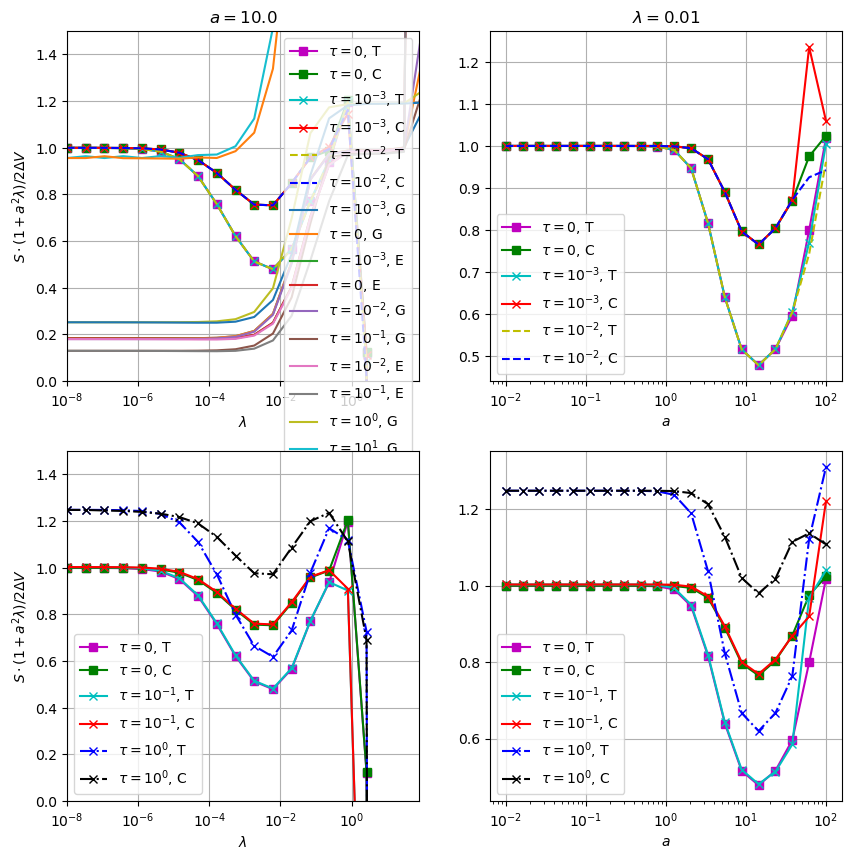

In [6]:
#print(S_l[0][0])
# s_l = []
# s_l0 = []
# for i in range(len(S_l)):
#     s_l.append(S_l[i][0])
#     s_l0.append(S_l0[i][0])

#np.savetxt("test_data.txt", [S_l, S_l0, S_lt, S_lt0, S_a, S_a0, S_at, S_at0, S_l2, S_lt2, S_a2, S_at2])
# np.savetxt("test_data_2.txt", [S_l3, S_lt3, S_a3, S_at3])
# np.savetxt("test_data_3.txt", [S_l4, S_lt4, S_a4, S_at4])
# np.savetxt("test_data_4.txt", [S_le, S_le0, S_lg, S_lg0])
#np.savetxt("test_data_5.txt", [S_le2, S_le3, S_lg2, S_lg3])
#np.savetxt("test_data_6.txt", [S_le4, S_le5, S_lg4, S_lg5])


data = np.loadtxt("test_data.txt")
S_l = data[0]
S_l0 = data[1]
S_lt = data[2]
S_lt0 = data[3]
S_a = data[4]
S_a0 = data[5]
S_at = data[6]
S_at0 = data[7]
S_l2 = data[8]
S_lt2 = data[9]
S_a2 = data[10]
S_at2 = data[11]

data1 = np.loadtxt("test_data_2.txt")
S_l3 = data1[0]
S_lt3 = data1[1]
S_a3 = data1[2]
S_at3 = data1[3]

data2 = np.loadtxt("test_data_3.txt")
S_l4 = data2[0]
S_lt4 = data2[1]
S_a4 = data2[2]
S_at4 = data2[3]

data3 = np.loadtxt("test_data_4.txt")
S_le = data3[0]
S_le0 = data3[1]
S_lg = data3[2]
S_lg0 = data3[3]

data4 = np.loadtxt("test_data_5.txt")
S_le2 = data4[0]
S_le3 = data4[1]
S_lg2 = data4[2]
S_lg3 = data4[3]

# data5 = np.loadtxt("test_data_6.txt")
# S_le4 = data5[0]
# S_le5 = data5[1]
# S_lg4 = data5[2]
# S_lg5 = data5[3]


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].plot(l, np.array(S_lt0) * (1 + 10**2 * l)/(2*0.25), "m-s", label=r"$\tau=0$, T")
ax[0, 0].plot(l, np.array(S_l0) * (1 + 10**2 * l)/(2*0.25), "g-s", label=r"$\tau=0$, C")
ax[0, 0].plot(l, np.array(S_lt) * (1 + 10**2 * l)/(2*0.25), "c-x", label=r"$\tau=10^{-3}$, T")
ax[0, 0].plot(l, np.array(S_l) * (1 + 10**2 * l)/(2*0.25), "r-x", label=r"$\tau=10^{-3}$, C")
ax[0, 0].plot(l, np.array(S_lt2) * (1 + 10**2 * l)/(2*0.25), "y--", label=r"$\tau=10^{-2}$, T")
ax[0, 0].plot(l, np.array(S_l2) * (1 + 10**2 * l)/(2*0.25), "b--", label=r"$\tau=10^{-2}$, C")

ax[0, 0].plot(l, np.array(S_lg) * (1 + 10**2 * l)/(2*0.25), label=r"$\tau=10^{-3}$, G")
ax[0, 0].plot(l, np.array(S_lg0) * (1 + 10**2 * l)/(2*0.25),  label=r"$\tau=0$, G")

ax[0, 0].plot(l, np.array(S_le) * (1 + 10**2 * l)/(2*0.25), label=r"$\tau=10^{-3}$, E")
ax[0, 0].plot(l, np.array(S_le0) * (1 + 10**2 * l)/(2*0.25),  label=r"$\tau=0$, E")

ax[0, 0].plot(l, np.array(S_lg2) * (1 + 10**2 * l)/(2*0.25), label=r"$\tau=10^{-2}$, G")
ax[0, 0].plot(l, np.array(S_lg3) * (1 + 10**2 * l)/(2*0.25),  label=r"$\tau=10^{-1}$, G")

ax[0, 0].plot(l, np.array(S_le2) * (1 + 10**2 * l)/(2*0.25), label=r"$\tau=10^{-2}$, E")
ax[0, 0].plot(l, np.array(S_le3) * (1 + 10**2 * l)/(2*0.25),  label=r"$\tau=10^{-1}$, E")

ax[0, 0].plot(l, np.array(S_lg4) * (1 + 10**2 * l)/(2*0.25), label=r"$\tau=10^{0}$, G")
ax[0, 0].plot(l, np.array(S_lg5) * (1 + 10**2 * l)/(2*0.25),  label=r"$\tau=10^{1}$, G")

ax[0, 0].plot(l, np.array(S_le4) * (1 + 10**2 * l)/(2*0.25), label=r"$\tau=10^{0}$, E")
ax[0, 0].plot(l, np.array(S_le5) * (1 + 10**2 * l)/(2*0.25),  label=r"$\tau=10^{1}$, E")


ax[1, 0].plot(l, np.array(S_lt0) * (1 + 10**2 * l)/(2*0.25), "m-s", label=r"$\tau=0$, T")
ax[1, 0].plot(l, np.array(S_l0) * (1 + 10**2 * l)/(2*0.25), "g-s", label=r"$\tau=0$, C")
ax[1, 0].plot(l, np.array(S_lt3) * (1 + 10**2 * l)/(2*0.25), "c-x", label=r"$\tau=10^{-1}$, T")
ax[1, 0].plot(l, np.array(S_l3) * (1 + 10**2 * l)/(2*0.25), "r-x", label=r"$\tau=10^{-1}$, C")
ax[1, 0].plot(l, np.array(S_lt4) * (1 + 10**2 * l)/(2*0.25), "b-.x", label=r"$\tau=10^{0}$, T")
ax[1, 0].plot(l, np.array(S_l4) * (1 + 10**2 * l)/(2*0.25), "k-.x", label=r"$\tau=10^{0}$, C")

ax[0, 1].plot(alp[:len(S_at0)], np.array(S_at0[:len(S_at0)])* (1 + alp[:len(S_at0)]**2 * 0.01)/(2*0.25), "m-s", label=r"$\tau=0$, T")
ax[0, 1].plot(alp[:len(S_a0)], np.array(S_a0[:len(S_a0)])* (1 + alp[:len(S_a0)]**2 * 0.01)/(2*0.25), "g-s", label=r"$\tau=0$, C")
ax[0, 1].plot(alp[:len(S_at)], np.array(S_at[:len(S_at)])* (1 + alp[:len(S_at)]**2 * 0.01)/(2*0.25), "c-x", label=r"$\tau=10^{-3}$, T")
ax[0, 1].plot(alp[:len(S_a)], np.array(S_a[:len(S_a)])* (1 + alp[:len(S_a)]**2 * 0.01)/(2*0.25), "r-x", label=r"$\tau=10^{-3}$, C")
ax[0, 1].plot(alp[:len(S_at2)], np.array(S_at2[:len(S_at2)])* (1 + alp[:len(S_at2)]**2 * 0.01)/(2*0.25), "y--", label=r"$\tau=10^{-2}$, T")
ax[0, 1].plot(alp[:len(S_a2)], np.array(S_a2[:len(S_a2)])* (1 + alp[:len(S_a2)]**2 * 0.01)/(2*0.25), "b--", label=r"$\tau=10^{-2}$, C")

ax[1, 1].plot(alp[:len(S_at0)], np.array(S_at0[:len(S_at0)])* (1 + alp[:len(S_at0)]**2 * 0.01)/(2*0.25), "m-s", label=r"$\tau=0$, T")
ax[1, 1].plot(alp[:len(S_a0)], np.array(S_a0[:len(S_a0)])* (1 + alp[:len(S_a0)]**2 * 0.01)/(2*0.25), "g-s", label=r"$\tau=0$, C")
ax[1, 1].plot(alp[:len(S_at3)], np.array(S_at3[:len(S_at3)])* (1 + alp[:len(S_at3)]**2 * 0.01)/(2*0.25), "c-x", label=r"$\tau=10^{-1}$, T")
ax[1, 1].plot(alp[:len(S_a3)], np.array(S_a3[:len(S_a3)])* (1 + alp[:len(S_a3)]**2 * 0.01)/(2*0.25), "r-x", label=r"$\tau=10^{-1}$, C")
ax[1, 1].plot(alp[:len(S_at4)], np.array(S_at4[:len(S_at4)])* (1 + alp[:len(S_at4)]**2 * 0.01)/(2*0.25), "b-.x", label=r"$\tau=10^{0}$, T")
ax[1, 1].plot(alp[:len(S_a4)], np.array(S_a4[:len(S_a4)])* (1 + alp[:len(S_a4)]**2 * 0.01)/(2*0.25), "k-.x", label=r"$\tau=10^{0}$, C")

for i in range(2):
    for j in range(2):
        ax[i, j].grid()
        ax[i, j].legend()
        ax[i, j].set_xscale("log")

ax[0, 0].set_xlabel(r"$\lambda$")
ax[0, 1].set_xlabel(r"$a$")
ax[1, 0].set_xlabel(r"$\lambda$")
ax[1, 1].set_xlabel(r"$a$")
ax[0, 0].set_ylabel(r"$S\cdot(1+a^2\lambda)/2\Delta V$")
ax[1, 0].set_ylabel(r"$S\cdot(1+a^2\lambda)/2\Delta V$")
ax[0, 0].axis([1e-8, 8e1, 0, 1.5])
ax[1, 0].axis([1e-8, 8e1, 0, 1.5])

ax[0, 1].set_title(r"$\lambda=0.01$")
ax[0, 0].set_title(r"$a=10.0$")

# plt.savefig("tau_comparison.pdf", dpi=500)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

def action_adj_2(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0, init_cond=np.ones(400), noise="d", b=1/2):
    test =  legendre.transform_adjust_2(lambda_=lambd, a=a, tau=tau, D1=0, D2=1, N=N, noise=noise, pot=pot, tmax=tm, const_i=ini, const_f=fin, b=b)
    res = test.minimize( maxiter=maxiter, in_cond=init_cond)
    return res.fun,res.x[:N]

N = 300
tau = 1e-3
tau2 = 1e-2
tau3 = 1e-1
tau4 = 1e1
tm = 100

l = np.logspace(-8, 2, base=10, num=20, endpoint=True)
alp = np.logspace(-2, 2, base=10, num=20,endpoint=True)


Act, Inst = action_adj_2(tau=tau, pot="m", noise="d", ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=10, lambd=0.01)
Act3, Inst3 = action_adj_2(tau=tau, pot="m", noise="g",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=10, lambd=0.01, b=0.8)
Act2, Inst2 = action_adj_2(tau=tau, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=10, lambd=0.01, b=0.8)

print("%f" % Act3)
#Act2, Inst2 = action_adj(tau=0.0, pot="m", noise="t",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=0, lambd=0)
#Act4, Inst4 = action_adj(tau=0.0, pot="m", noise="t",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=l, b=1/2)
#Act5, Inst5 = action_adj(tau=0.0, pot="m", noise="t",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=1e-8, b=1/2, init_cond=Inst4)

#Act6, Inst6 = action_adj(tau=0.0, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=0, lambd=0)
#Act7, Inst7 = action_adj(tau=0.0, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=l, b=1/2)
#Act8, Inst8 = action_adj(tau=0.0, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=1e-8, b=1/2, init_cond=Inst4)


lambda 	|	 1.000000e-02
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.190603
         Iterations: 66
         Function evaluations: 25585
         Gradient evaluations: 85
lambda 	|	 1.000000e-02
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: gamma distributed with scale 0.800000
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.087752
         Iterations: 54
         Function evaluations: 21070
         Gradient evaluations: 70
lambda 	|	 1.000000e-02
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 100.000000
 N 	|	 300

Noise: symmetric exponential with characteristic scale 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Curre

0.351008


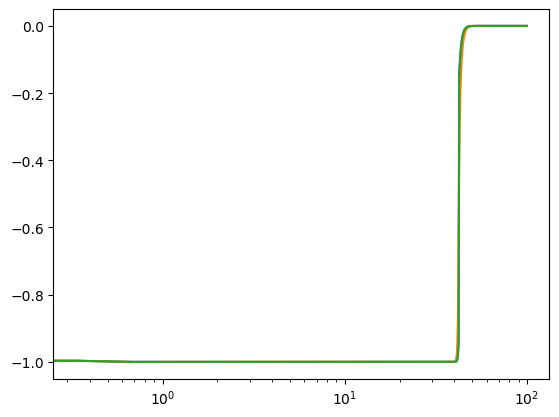

In [4]:
y = Inst3
# lambda_=l
# D=1
# karra = np.linspace(-10, 10, 200)
# k2 = [karra[np.argmax([k*y[i] - D/2*k**2 - lambda_*(np.cosh(a*k)-1) for k in karra])] for i in range(0,len(y))]
plt.plot(np.linspace(0, tm, N), y)
plt.plot(np.linspace(0, tm, N), Inst)
plt.plot(np.linspace(0, tm, N), Inst2)
plt.xscale("log")
print("%f" % (Act3/(2 * 0.25 / (1 + 10**2 * 0.01))))



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0, init_cond=np.zeros(400), noise="d", b=1/2, D=1):
    test =  legendre.transform_adjust_2(lambda_=lambd, a=a, tau=tau, D1=0, D2=D, N=N, noise=noise, pot=pot, tmax=tm, const_i=ini, const_f=fin, b=b)
    res = test.minimize( maxiter=maxiter, in_cond=init_cond)
    return res.fun

N = 300
tm = 20

index = 11

l = np.logspace(-8, 2, base=10, num=20, endpoint=True)
alp = np.logspace(-2, 2, base=10, num=20,endpoint=True)
tau = np.array([0, 1e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1e0])

In [2]:
S_lowlc = []
S_medlc = []
S_lowlt = []
S_medlt = []

for t in tau:
    print("############################################################")
    S_lowlc.append(action_adj(tau=t, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[0]))
    S_medlc.append(action_adj(tau=t, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[index]))
    S_lowlt.append(action_adj(tau=t, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[0]))
    S_medlt.append(action_adj(tau=t, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[index]))

############################################################
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.499672
         Iterations: 160
         Function evaluations: 48762
         Gradient evaluations: 162
lambda 	|	 6.158482e-03
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.230954
         Iterations: 227
         Function evaluations: 93620
         Gradient evaluations: 311
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 20.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current functi

In [3]:
S_lowg = []
S_medg = []

for t in tau:
    print("############################################################")
    S_lowg.append(action_adj(tau=t, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=0, D=(1 + l[0]*10**2)))
    S_medg.append(action_adj(tau=t, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=0, D=(1 + l[index]*10**2)))

############################################################
lambda 	|	 0.000000e+00
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000001 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.499797
         Iterations: 161
         Function evaluations: 49063
         Gradient evaluations: 163
lambda 	|	 0.000000e+00
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.615848 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.309318
         Iterations: 151
         Function evaluations: 46053
         Gradient evaluations: 153
############################################################
lambda 	|	 0.000000e+00
 a 	|	 10.000000 
 tau 	|	 0.000100 
 D 	|	 1.000001 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: qu

In [6]:
S_nog = []
for t in tau:
    print("############################################################")
    S_nog.append(action_adj(tau=t, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=0, D=1))

############################################################
lambda 	|	 0.000000e+00
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.499798
         Iterations: 157
         Function evaluations: 47859
         Gradient evaluations: 159
############################################################
lambda 	|	 0.000000e+00
 a 	|	 10.000000 
 tau 	|	 0.000100 
 D 	|	 1.000000 
 tmax 	|	 20.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

Optimization terminated successfully.
         Current function value: 0.499796
         Iterations: 163
         Function evaluations: 49364
         Gradient evaluations: 164
############################################################
lambda 	|	 0.000000e+00
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 20.00

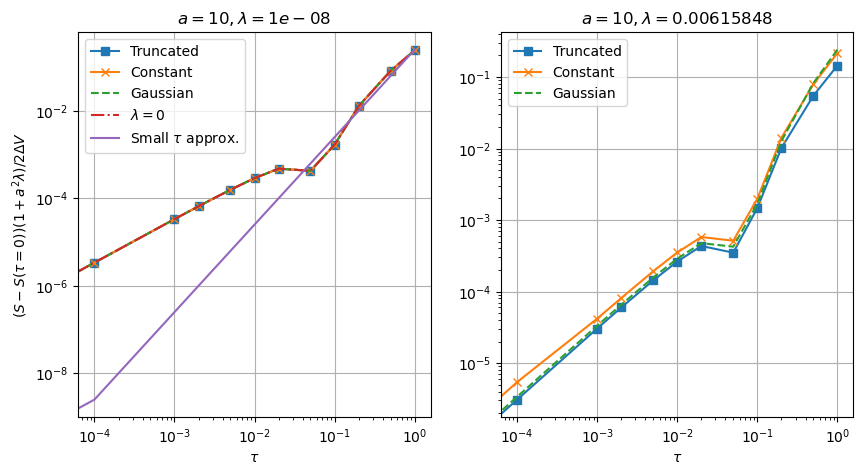

In [15]:
def g(t):
    dV = S_lowg[0]
    return dV * (0.5 * t**2)# - 6/5 * t**4 + 279/35 * t**6)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True)

ax[0].plot(tau, np.abs(np.array(S_lowlt)-S_lowlt[0])*(1 + 10**2 * l[0]) / (2*0.25), "-s", label="Truncated")
ax[0].plot(tau, np.abs(np.array(S_lowlc)-S_lowlc[0])*(1 + 10**2 * l[0]) / (2*0.25), "-x", label="Constant")
ax[0].plot(tau, np.abs(np.array(S_lowg)-S_lowg[0])*(1 + 10**2 * l[0]) / (2*0.25), "--", label="Gaussian")
ax[0].plot(tau, np.abs(np.array(S_nog)-S_nog[0])/ (2*0.25), "-.", label=r"$\lambda=0$")
ax[0].plot(tau, g(tau), label=r"Small $\tau$ approx.")


ax[1].plot(tau, np.abs(np.array(S_medlt)-S_medlt[0])*(1 + 10**2 * l[index]) / (2*0.25), "-s", label="Truncated")
ax[1].plot(tau, np.abs(np.array(S_medlc)-S_medlc[0])*(1 + 10**2 * l[index]) / (2*0.25), "-x", label="Constant")
ax[1].plot(tau, np.abs(np.array(S_medg)-S_medg[0])*(1 + 10**2 * l[index]) / (2*0.25), "--", label="Gaussian")



ax[1].set_xlabel(r"$\tau$")
ax[0].set_xlabel(r"$\tau$")

ax[0].set_ylabel(r"$(S-S(\tau=0))(1 + a^2\lambda) / 2\Delta V$")

ax[0].set_title(r"$a=10, \lambda=%g$" % l[0])
ax[1].set_title(r"$a=10, \lambda=%g$" % l[index])

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.savefig("tau_evolution.pdf", dpi=500, bbox_inches="tight")